Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# Train and test data sets are stored in google drive. That path has been specified
data_dir_train = pathlib.Path("/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/")
data_dir_test = pathlib.Path('/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Test/')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

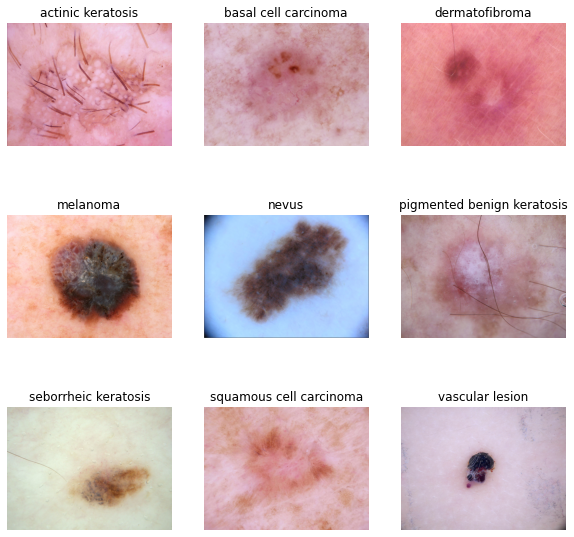

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
c=0
for i in class_names: 
  plt.subplot(3, 3, c + 1)
  image = plt.imread(str(list(data_dir_train.glob(i+'/*.jpg'))[1]))
  plt.title(i)
  plt.imshow(image)  
  plt.axis("off")
  c=c+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

classesnum = 9
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classesnum)
  
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 15s 74ms/step - loss: 2.0724 - accuracy: 0.2271 - val_loss: 2.0252 - val_accuracy: 0.2483
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.7563 - accuracy: 0.3756 - val_loss: 1.5624 - val_accuracy: 0.4541
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4554 - accuracy: 0.4955 - val_loss: 1.4585 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3647 - accuracy: 0.5290 - val_loss: 1.4672 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3166 - accuracy: 0.5296 - val_loss: 1.4502 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2169 - accuracy: 0.5904 - val_loss: 1.3683 - val_accuracy: 0.5548
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.1007 - accuracy: 0.6088 - val_loss: 1.4092 - val_accuracy: 0.5235
Epoch 8/20
5

### Visualizing training results

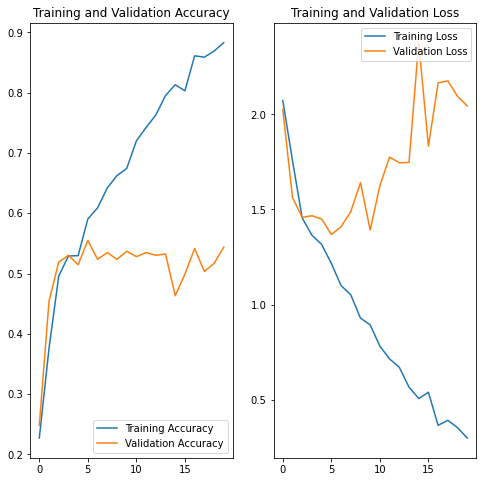

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

It clearly is overfitting as:

1. There is a huge gap between training and validation accuracy

2. Very high training accuracy but lower validation acuracy and vice versa for losses. Model performs well on train dataset but fails to generalise on validation dataset.


                                                  

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

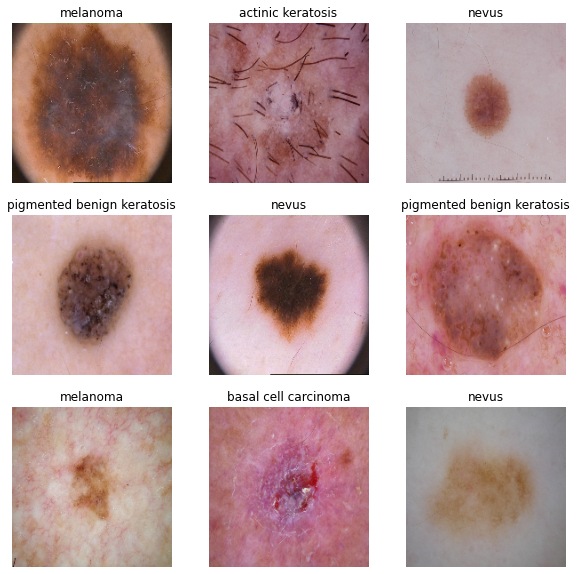

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
#your code
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classesnum)
])


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 29ms/step - loss: 2.0053 - accuracy: 0.2455 - val_loss: 1.9140 - val_accuracy: 0.2640
Epoch 2/20
56/56 [==============================] - 1s 26ms/step - loss: 1.7353 - accuracy: 0.3772 - val_loss: 1.5646 - val_accuracy: 0.4094
Epoch 3/20
56/56 [==============================] - 1s 26ms/step - loss: 1.5593 - accuracy: 0.4358 - val_loss: 1.5165 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.5084 - accuracy: 0.4576 - val_loss: 1.4280 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3914 - accuracy: 0.5095 - val_loss: 1.4730 - val_accuracy: 0.4609
Epoch 6/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3602 - accuracy: 0.5134 - val_loss: 1.4289 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 1.2755 - accuracy: 0.5452 - val_loss: 1.3980 - val_accuracy: 0.5391
Epoch 8/20
56

### Visualizing the results

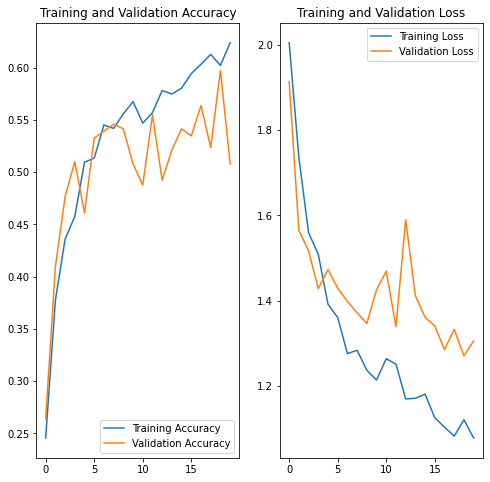

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Observation : After performing the data augmentation and adding dropping layer, overfitting has   significantly reduced.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

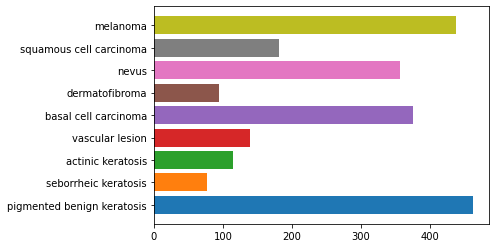

In [ ]:
## Your code goes here.
import os
from pathlib import Path
path = '/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/'
limit = 0
# Fetch all directories 
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name))]) 
for folder in folders:
    # Fetch list of contents
    contents = os.listdir(os.path.join(path,folder))
    # Dislay folder and number of contents, if it is greater than the limit 
    if len(contents) >= limit: 
        plt.barh(folder,len(contents))

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? **seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples? : **pigmented benign keratosis**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F2954B9F410>: 100%|██████████| 500/500 [00:19<00:00, 25.46 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2954B38F90>: 100%|██████████| 500/500 [00:20<00:00, 23.93 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2954D7BF50>: 100%|██████████| 500/500 [00:22<00:00, 22.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=771x750 at 0x7F2954B8A3D0>: 100%|██████████| 500/500 [01:25<00:00,  5.82 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F2954CD00D0>: 100%|██████████| 500/500 [01:26<00:00,  5.76 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F296E359050>: 100%|██████████| 500/500 [00:18<00:00, 26.74 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F2A17497A90>: 100%|██████████| 500/500 [00:41<00:00, 12.07 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F295510D550>: 100%|██████████| 500/500 [00:18<00:00, 27.18 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F29EB0B3090>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
from glob import glob

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026493.jpg_8e16004a-0087-4dbb-8258-62e0f6f208b9.jpg',
 '/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025157.jpg_073d062b-db76-4ffc-ae72-74d12cee1967.jpg',
 '/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025136.jpg_53daf27b-1ec1-40f2-aa66-1587d0e17468.jpg',
 '/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025777.jpg_a0f26553-58b1-4287-b58c-a190e9da9ca3.jpg',
 '/content/drive/MyDrive/ColabNotebooks/Melanoma_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026907.jpg_f7b40cb4-6809-4718-a245-0ba2ad46cfcd.jpg',
 '/content/drive/MyD

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesson_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [ ]:
dataframe_dict = dict(zip(path_list, lesson_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train= os.path.join(data_dir_train)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
normalizlr = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalizlr(x), y))
image_batch, labels_batch = next(iter(normalized_ds))


In [ ]:
firstimag = image_batch[0]
# The pixels values are now in `[0,1]`.
print(np.min(firstimag), np.max(firstimag))

0.0 0.99640524


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
169/169 [==============================] - 31s 175ms/step - loss: 1.2085 - accuracy: 0.5401 - val_loss: 1.2023 - val_accuracy: 0.5546
Epoch 2/30
169/169 [==============================] - 30s 172ms/step - loss: 1.1354 - accuracy: 0.5625 - val_loss: 1.1056 - val_accuracy: 0.5583
Epoch 3/30
169/169 [==============================] - 30s 174ms/step - loss: 1.0706 - accuracy: 0.5916 - val_loss: 1.1363 - val_accuracy: 0.5768
Epoch 4/30
169/169 [==============================] - 30s 172ms/step - loss: 1.0050 - accuracy: 0.6165 - val_loss: 1.0807 - val_accuracy: 0.5857
Epoch 5/30
169/169 [==============================] - 30s 171ms/step - loss: 1.0092 - accuracy: 0.6246 - val_loss: 1.0523 - val_accuracy: 0.5813
Epoch 6/30
169/169 [==============================] - 30s 169ms/step - loss: 0.9632 - accuracy: 0.6365 - val_loss: 0.9857 - val_accuracy: 0.6244
Epoch 7/30
169/169 [==============================] - 30s 171ms/step - loss: 0.9217 - accuracy: 0.6493 - val_loss: 0.8898 - val_ac

#### **Todo:**  Visualize the model results

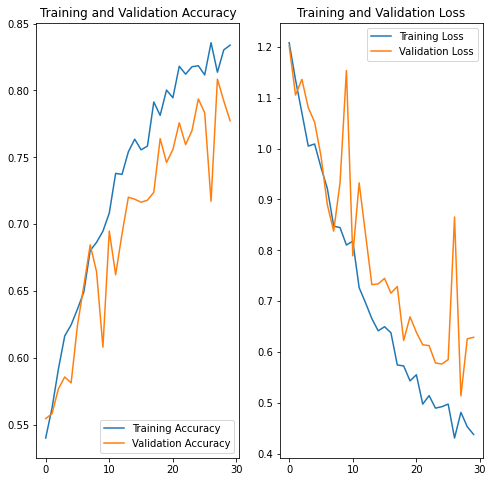

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes there is no overfitting issue. The class rebalance helped in increasing the validation accuracy and reducing the gap between train and validation accuracy. 
